# Titanic Dataset - Projeto Final

Neste projeto, irei analisar alguns dados sobre os passageiros do trágico naufrágio ocorrido em 1914, obtendo conclusões relevantes acerca do fato.
## Sumário
1. <a href=#importando>Importando</a>
2. <a href=#leitura-csv>Leitura do CSV</a>
3. <a href=#bad>Breve análise dos dados</a>
4. <a href=#limpeza>Limpeza do dataset</a>
5. <a href=#exploring>Explorando os dados</a>
    1. <a href=#q1>Pergunta 1: Quem sobreviveu pagou mais caro?</a>
    2. <a href=#q2>Pergunta 2: Os sobreviventes estavam mais concentrados nas primeiras classes?</a>
    3. <a href=#q3>Pergunta 3: Em qual faixa etária houveram mais mortes?</a>
    4. <a href=#q4>Pergunta 4: Quem sobreviveu mais? Homens ou mulheres?</a>
    5. <a href=#q5>Pergunta 5: Ter parentes a bordo influenciou na morte?</a>
    6. <a href=#q6>Pergunta 6: A categoria de embarque influenciou na quantidade de mortos?¶</a>
6. <a href=#conclusoes>Conclusões<a>
7. <a href=#problemas>Problemas encontrados</a>

<a id="importando"></a>

## 1. Importando
Neste primeiro momento, irei fazer as importações de bibliotecas necessárias ao projeto.

In [2]:
''' 
Importando as bibliotecas necessárias para trabalhar, como Pandas, 
Numpy e Matplotlib.
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id="leitura-csv"></a>

## 2. Leitura do CSV
Iniciando a leitura do arquivo CSV para poder trabalhar.

In [3]:
'''
A variável 'df' irá receber a leitura do arquivo CSV através do 
comando read_csv do Pandas.
'''

df = pd.read_csv('titanic.csv')
df.head() # Testando se a leitura do CSV ocorreu sem erros.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id="bad"></a>

## 3. Breve análise dos dados
Nos comandos a seguir, irei analisar como está atualmente o arquivo CSV. 

Utilizando o df.shape, já poderei verificar o tamanho de meu arquivo (linhas x colunas);

Utilizando df.describe(), já tenho como saber algumas informações, tais como:
- A porcentagem dos sobreviventes foi de aproximadamente 38%;
- A média de idade dos passageiros é de aproximadamente 29, 30 anos;
- A maioria dos passageiros tinha entre 28 a 38 anos de idade;
- Existiam alguns bebês.

Utilizando df.info(), consigo visualizar os tipos de dado referente a cada coluna.

In [4]:
# Com este comando, tenho uma ideia geral de quantas linhas e colunas tenho em meu dataset.
df.shape

(891, 12)

In [5]:
'''
Função que me apresenta estatística descritiva sobre meu dataset,
resumindo a tendência central, dispersão e tamanho de meu dataset.
'''

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
'''
Este método exibe um sumário rápido do dataset com informações que incluem
o nome das colunas, a quantidade de valores nas linhas, valores não-nulos,
uso de memória e os tipos de dados das colunas, se é int, float, string, etc.
'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<a id="limpeza"></a>

## 4. Limpeza do dataset
A limpeza dos dados é uma parte importantíssima para não precisarmos trabalhar com dados irrelevantes. Aqui, irei limpar algumas colunas que julgo não serem importantes para a execução do trabalho.

In [7]:
# Removendo colunas que não utilizarei.
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

Acima, removi as colunas que não me interessavam e abaixo visualizo como ficou meu dataset.

In [8]:
df.head() # Testando se a remoção das colunas ocorreu.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
df.info() # Visualizando novamente para ver quais colunas restaram.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Observando o df.info() acima, nota-se que existem duas colunas com menos valores do que o total. Ou seja, existem valores não preenchidos que devem ser corrigidos, como a coluna 'Age' e 'Embarked'.

Visualizando rapidamente o gráfico geral do dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008BA5CF8>,
      dtype=object)

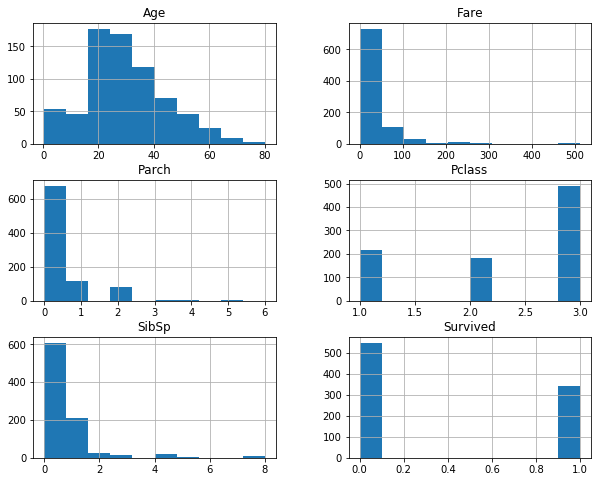

In [11]:
df.hist(figsize=(10, 8)) # Utilizei o hist() para me gerar um gráfico rápido com todas as colunas e ter um overview.

Agora, irei preencher os valores de idade restantes que estão em branco, com a média de idade dos passageiros. Assim, a coluna Age deverá ficar com 891 valores.

In [12]:
# Preenchendo os campos em branco com a média da idade dos passageiros,
# pois não tenho como saber a idade dos que estão com valor nulo.
df.fillna(df.mean(), inplace=True)
df.info() # Verificando se a coluna 'Age foi preenchida para 891'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Vamos verificar quais linhas estão com a coluna Embarked em branco.

In [13]:
df[df.Embarked.isnull()] # Verificando quem está com valor nulo na coluna 'Embarked'

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


Está tudo bem se removermos estas duas linhas. Não fará tanta diferença em nossa amostragem. Agora teremos um total de 889 linhas para todas as colunas em nosso dataset. Assim teremos a mesma quantidade de dados para cada coluna.

In [15]:
df.dropna(inplace=True) # Removendo estas duas linhas do dataset. Não farão diferença no relatório.
df.info() # Verificando se agora todas as linhas terão 889 valores, concluindo a limpeza dos dados.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


<a id="exploring"></a>

## 5. Explorando os dados
Agora que nosso dataset já foi limpo, iremos começar a explorar os dados de maneira a começar a obter respostas relevantes com números e gráficos.

In [16]:
survived = df.Survived == True # Separando os dados de sobreviventes na variável 'survived'
died = df.Survived == False # Separando os dados de mortos na variável 'died'

Acima, acabamos de separar os datasets em dois. O primeiro grupo contém todas as informações daqueles que sobreviveram, armazenado no novo dataset 'survived'. As informações sobre os que morreram estão no 'died'.

<a id="q1"></a>

### Pergunta 1: Quem sobreviveu pagou mais caro?
Para responder esta questão, irei pegar a média paga de tarifa entre os que sobreviveram e os que morreram, comparando os valores.

In [17]:
# Média paga de tarifa de todos os que sobreviveram
df.Fare[survived].mean()

48.209498235294106

In [18]:
# Média paga de tarifa de todos os que morreram
df.Fare[died].mean()

22.117886885245877

### Resposta 1:
Podemos verificar acima, em geral, os passageiros que pagaram mais caro, sobreviveram, e quem pagou tarifas menores não sobreviveu tanto assim.

Agora irei plotar um gráfico comparando as tarifas entre quem sobreviveu e quem não sobreviveu para facilitar a visualização. Percebe-se que a medida que o valor da tarifa vai aumentando, a quantidade de mortos diminui.

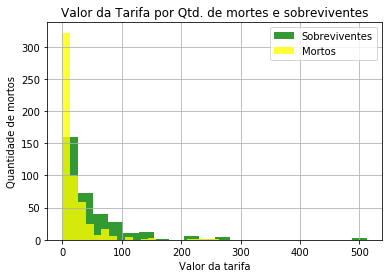

In [37]:
# Gráfico da taxa paga pelos sobreviventes
df.Fare[survived].hist(alpha=0.8, bins=20, color='green', label='Sobreviventes') 
# Gráfico da taxa paga pelos mortos
df.Fare[died].hist(alpha=0.8, bins=20, color='yellow', label='Mortos')
plt.title('Valor da Tarifa por Qtd. de mortes e sobreviventes') # Definindo título do gráfico
plt.xlabel('Valor da tarifa') # Definindo a legenda no eixo x
plt.ylabel('Quantidade de mortos') # Definindo a legenda no eixo y
plt.legend(); # Exibindo a legenda das cores.

<a id="q2"></a>

### Pergunta 2: Os sobreviventes estavam mais concentrados nas primeiras classes?
Para responder esta questão, irei plotar um gráfico comparativo entre a média de sobreviventes nas classes 1, 2 e 3.

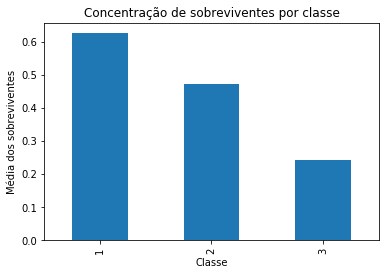

In [32]:
# Usando groupby por classe de passageiros para pegar a média dos sobreviventes em cada uma, exibindo em Barras.
df.groupby('Pclass').Survived.mean().plot(kind='bar')
plt.title('Concentração de sobreviventes por classe') # Definindo título do gráfico
plt.xlabel('Classe') # Legenda do eixo X
plt.ylabel('Média dos sobreviventes'); # Legenda do eixo Y

### Resposta 2:

Utilizando o groupby(), verificamos acima através do gráfico, que a média de sobreviventes aumenta de acordo com a classe na qual o passageiro estava alocado. Portanto, quem estava na primeira classe, teve uma chance maior de sobrevivência.

<a id="q3"></a>

### Pergunta 3: Em qual faixa etária houveram mais mortes?
Para responder esta questão, irei plotar um gráfico comparando a idade dos que sobreviveram com a idade dos que morreram. Assim, poderemos ter uma ideia de ambos os lados.

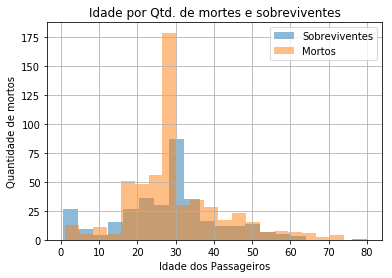

In [38]:
# Gráfico da idade dos sobreviventes em relação à quantidade
df.Age[survived].hist(alpha=0.5, bins=20, label='Sobreviventes')
# Gráfico da idade dos mortos em relação à quantidade
df.Age[died].hist(alpha=0.5, bins=20, label='Mortos')
plt.title('Idade por Qtd. de mortes e sobreviventes')
plt.xlabel('Idade dos Passageiros') # Definindo a legenda no eixo x
plt.ylabel('Quantidade de mortos') # Definindo a legenda no eixo y
plt.legend(); # Exibindo a legenda das cores.

### Resposta 3:
Verificamos neste gráfico acima, que a quantidade de mortos foi extremamente grande nas pessoas com idade entre 25 a 30 anos.

<a id="q4"></a>

### Pergunta 4: Quem sobreviveu mais? Homens ou mulheres?
Para responder esta pergunta, irei plotar um gráfico simples com a média dos sobreviventes de cada gênero, além de fornecer informações detalhadas sobre a quantidade de sobreviventes em cada classe, separados por gênero.

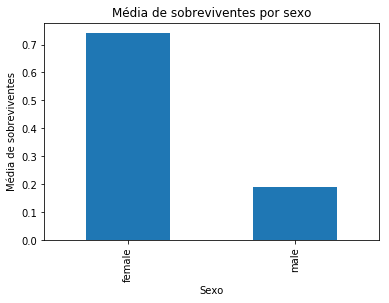

In [41]:
# Plotando um gráfico de barras agrupado pelo gênero, com a média de sobreviventes de cada sexo.
df.groupby('Sex').Survived.mean().plot(kind='bar')
plt.title('Média de sobreviventes por sexo') # Definindo título do gráfico
plt.xlabel('Sexo') # Legenda do eixo X
plt.ylabel('Média de sobreviventes'); # Legenda do eixo Y

Utilizando o groupby(), podemos verificar que a quantidade de mulheres sobreviventes foi significativamente maior que a dos homens. Ainda que a quantidade de mulheres no geral fosse um pouco mais da metade que a quantidade dos homens.

In [36]:
# Aqui eu estou listando numericamente a quantidade total (incluindo os mortos), separados por gênero.
df.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

Verifica-se que, apesar de existirem muito mais homens do que mulheres, praticamente o dobro da quantidade, foram as mulheres quem mais sobreviveram em relação aos homens.

Utilizando o groupby(), abaixo é exibido a quantidade de pessoas por sua classe de alocação. Podemos verificar que a maioria dos homens estavam na terceira classe e que em ambos os sexos existiam mais pessoas na primeira classe do que na segunda.

In [37]:
# Agrupando o Sexo e a Classe do Passageiro e contabilizando a quantidade de pessoas em cada classe e sexo.
df.groupby('Sex')['Pclass'].value_counts()

Sex     Pclass
female  3         144
        1          92
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

Utilizando uma query, podemos obter a mediana dos valores pagos pelo sexo feminino e pelo sexo masculino. Conseguimos visualizar que as mulheres pagaram tarifas maiores.

In [38]:
# Aqui eu estou executando uma query e obtendo a mediana da tarifa paga pelas mulheres e também pelos homens.
df.query('Sex == "female"')['Fare'].median(), df.query('Sex == "male"')['Fare'].median()

(23.0, 10.5)

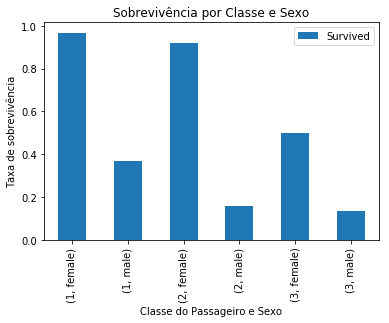

In [45]:
# Aqui estou plotando um gráfico de barras agrupado por classe e sexo.
df.groupby(['Pclass', 'Sex']).Survived.mean().plot(kind='bar')
plt.title('Sobrevivência por Classe e Sexo') # Definindo título do gráfico
plt.xlabel('Classe do Passageiro e Sexo') # Definindo a legenda do eixo X
plt.ylabel('Taxa de sobrevivência') # Definindo a legenda do eixo Y
plt.legend();

Com o uso do groupby(), podemos verificar neste gráfico acima, que as mulheres de todas as classes tem uma média de sobrevivência maior que dos homens em qualquer classe. Uma diferença enorme.

### Resposta 4:
De acordo com tudo que foi feito, podemos concluir que:
1. A média de sobrevivência de mulheres foi significativamente superior à dos homens. Ainda que a quantidade de mulheres fosse praticamente um pouco mais da metade da quantidade de homens.
2. As mulheres em geral, pagaram tarifas maiores que dos homens. Praticamente um pouco mais que o dobro dos homens. Já vimos que o valor da tarifa paga também influenciou na sobrevivência das pessoas.
3. A taxa de sobrevivência de mulheres em qualquer uma das três classes superou a taxa dos homens. 

<a id="q5"></a>

### Pergunta 5: Ter parentes a bordo influenciou na morte?
Para responder esta questão, iremos plotar um gráfico com relação à quantidade de parentes a bordo e a quantidade de mortos. 

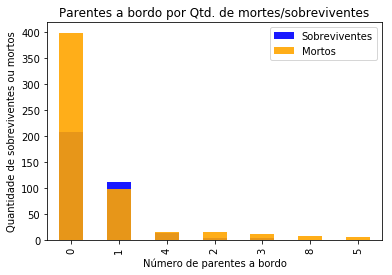

In [46]:
# Plotando gráfico com a contagem de sobreviventes em relação à quantidade de parentes.
df.SibSp[survived].value_counts().plot(kind='bar', alpha=0.9, color='blue', label='Sobreviventes')
# Plotando gráfico com a contagem de mortos em relação à quantidade de parentes.
df.SibSp[died].value_counts().plot(kind='bar', alpha=0.9, color='orange', label='Mortos')
plt.title('Parentes a bordo por Qtd. de mortes/sobreviventes') # Definindo título do gráfico
plt.xlabel('Número de parentes a bordo') # Definindo legenda do eixo X
plt.ylabel('Quantidade de sobreviventes ou mortos') # Definindo legenda do eixo Y
plt.legend(); # Exibindo a legenda das cores.

### Resposta 5:
Verificamos através deste gráfico comparativo acima, que haver parentes junto está estritamente relacionado com a sobrevivência ou não das pessoas a bordo. Ou seja, quanto mais parentes a bordo, menos chance de haver sobreviventes.

<a id="q6"></a>

### Pergunta  6: A categoria de embarque influenciou na quantidade de mortos?
Para responder esta questão, iremos analisar o gráfico comparativo entre as categorias de embarque e verificar os números que nos serão apresentados.

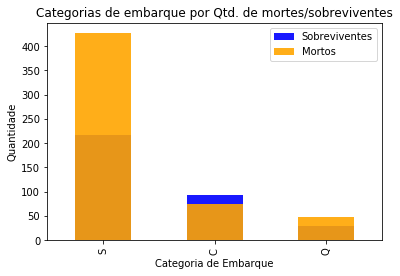

In [50]:
# Plotando gráfico de barras da quantidade de sobreviventes em relação às categorias de embarque
df.Embarked[survived].value_counts().plot(kind='bar', alpha=0.9, color='blue', label='Sobreviventes')
# Plotando gráfico de barras da quantidade de mortos em relação às categorias de embarque
df.Embarked[died].value_counts().plot(kind='bar', alpha=0.9, color='orange', label='Mortos')
plt.title('Categorias de embarque por Qtd. de mortes/sobreviventes') # Definindo título do gráfico
plt.xlabel('Categoria de Embarque') # Definindo legenda do eixo X
plt.ylabel('Quantidade') # Legenda do eixo Y
plt.legend(); # Exibindo a legenda das cores.

### Resposta 6:
De acordo com o gráfico apresentado acima, podemos visualizar e concluir que as pessoas da categoria de embarque S morreram bastante se comparados com as categorias C e Q.

<a id="conclusoes"></a>

# 6. Conclusões
De acordo com tudo que foi explorado neste projeto, pode-se afirmar alguns pontos bastante interessantes, tais como:

- A faixa etária com mais sobreviventes foi de 30 anos em média;
- Quem pagou mais caro teve uma taxa de sobrevivência maior;
- Quem estava em classes mais altas tiveram taxas de sobrevivência maior;
- A principal concentração dos mortos estava na faixa entre 20 e 30 anos de idade;
- A quantidade de mulheres sobreviventes foi significativamente maior que dos homens;
- A grande maioria dos homens estavam na terceira classe e tanto para homens e mulheres, a quantidade de pessoas na primeira classe superou a quantidade na segunda classe;
- Em todas as classes, a média de mulheres sobreviventes foi maior do que dos homens em qualquer classe. Até as mulheres da terceira classe tiveram uma média de sobrevivência maior que dos homens de primeira classe.
- Conseguimos verificar que haver parentes junto estava estritamente relacionado com a sobrevivência ou não da pessoa. Quanto menos parentes, maiores as chances de sobrevivência.
- De acordo com as categorias de embarque, verificamos que as pessoas que estavam na categoria de embarque S tiveram índices de sobrevivência e mortes muito maior do que as demais categorias.

<a id="problemas"></a>

## Problemas encontrados

Sobre as limitações que houveram neste projeto, existiu o fato de que a coluna 'Age', referente a idade dos passageiros, não estava completa e foi preenchida com a média da idade dos passageiros. Pode haver alguma forma para explorar melhor estas idades.

Pode ser que com uma análise preditiva ou outros métodos mais elaborados, possamos concluir melhor e mais assertivamente sobre a idade dos passageiros restantes que ficaram com valor nulo.

Houveram duas linhas onde não existiam valores, na coluna 'Embarked'. Estas duas linhas não iriam afetar muito o relatório do projeto e foram removidas para que o dataset ficasse uniforme.

Como o barco tinha em torno de 1300 passageiros na realidade, mais a tripulação, esta análise certamente será afetada, mas acredito que proporcionalmente os valores crescerão juntamente com a quantidade de pessoas e funcionários a bordo.